<a href="https://colab.research.google.com/github/Shaanvitha/installing-matplotlib_seaborn_numpy/blob/main/Assignment_13%5BDecision_Tree_1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Task 1: Data Preparation
data = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [ ]:
# Task 2: Exploratory Data Analysis (EDA)
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
# Check for missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


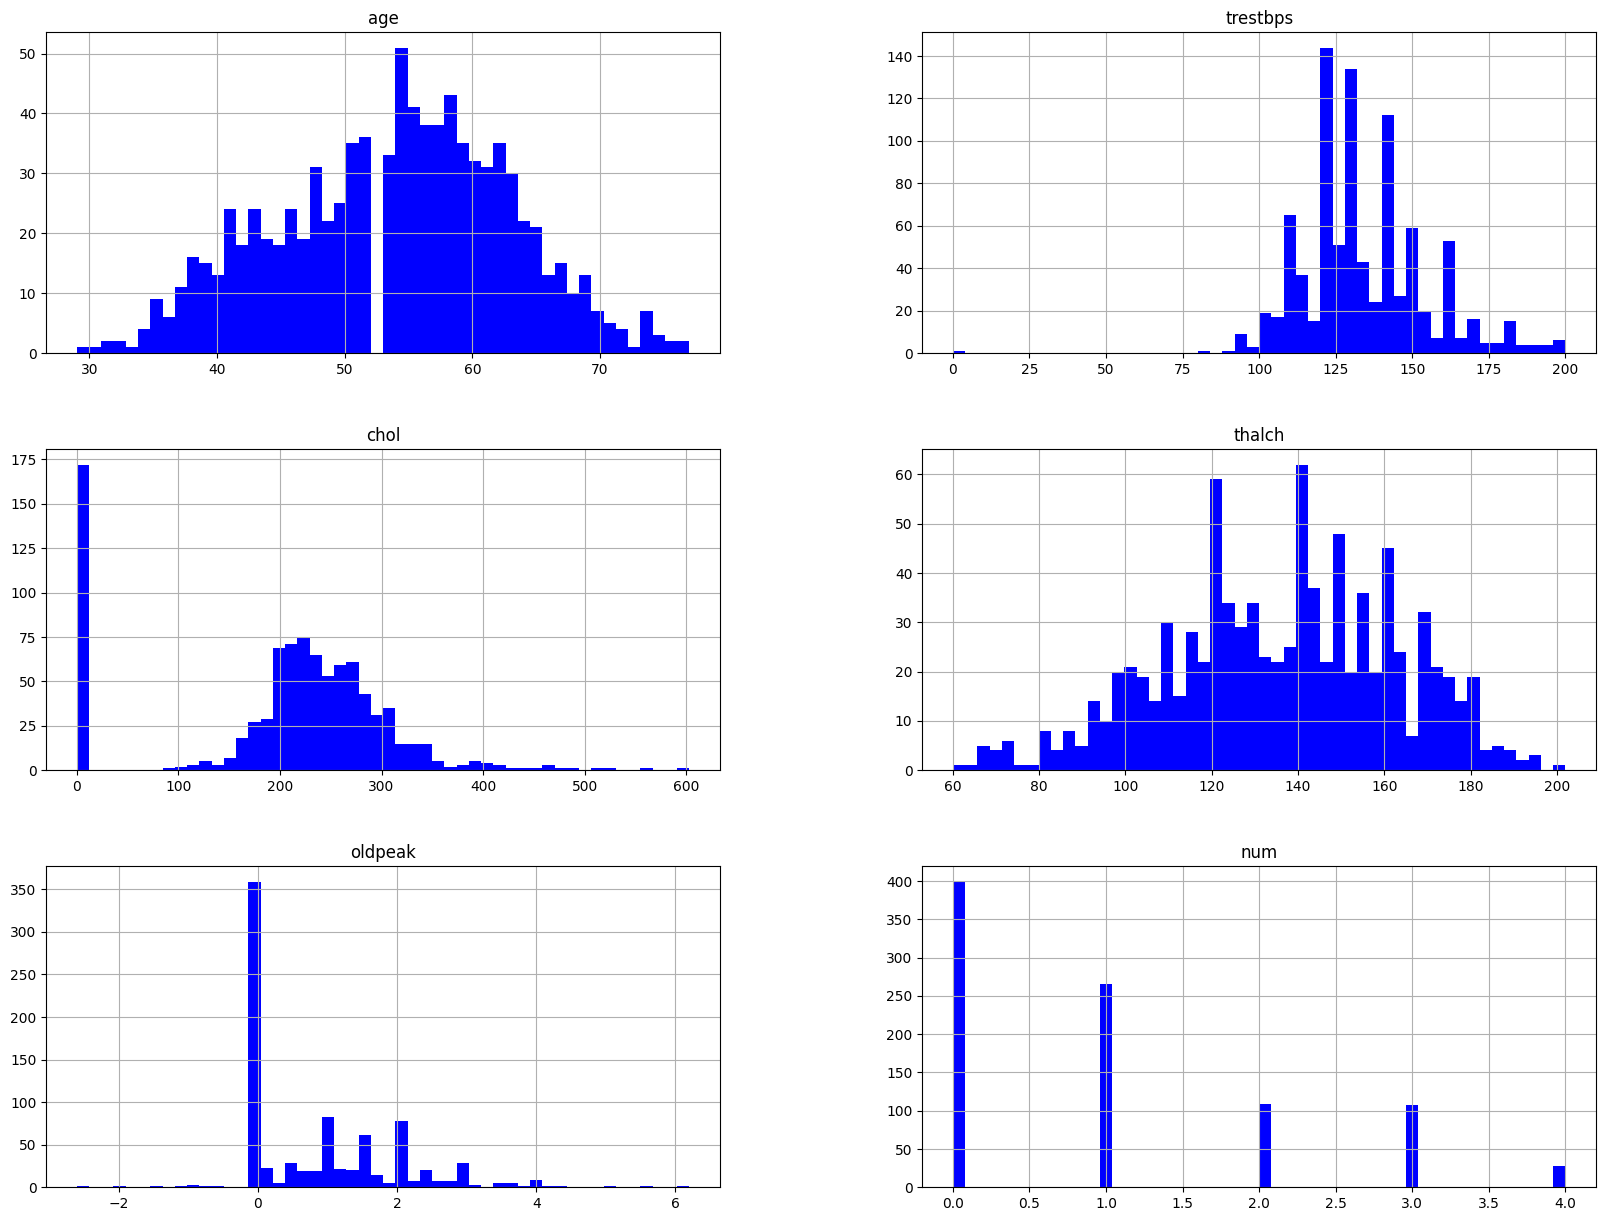

In [ ]:
# Visualize feature distributions
data.hist(bins=50, figsize=(20, 15), color='blue')
plt.show()

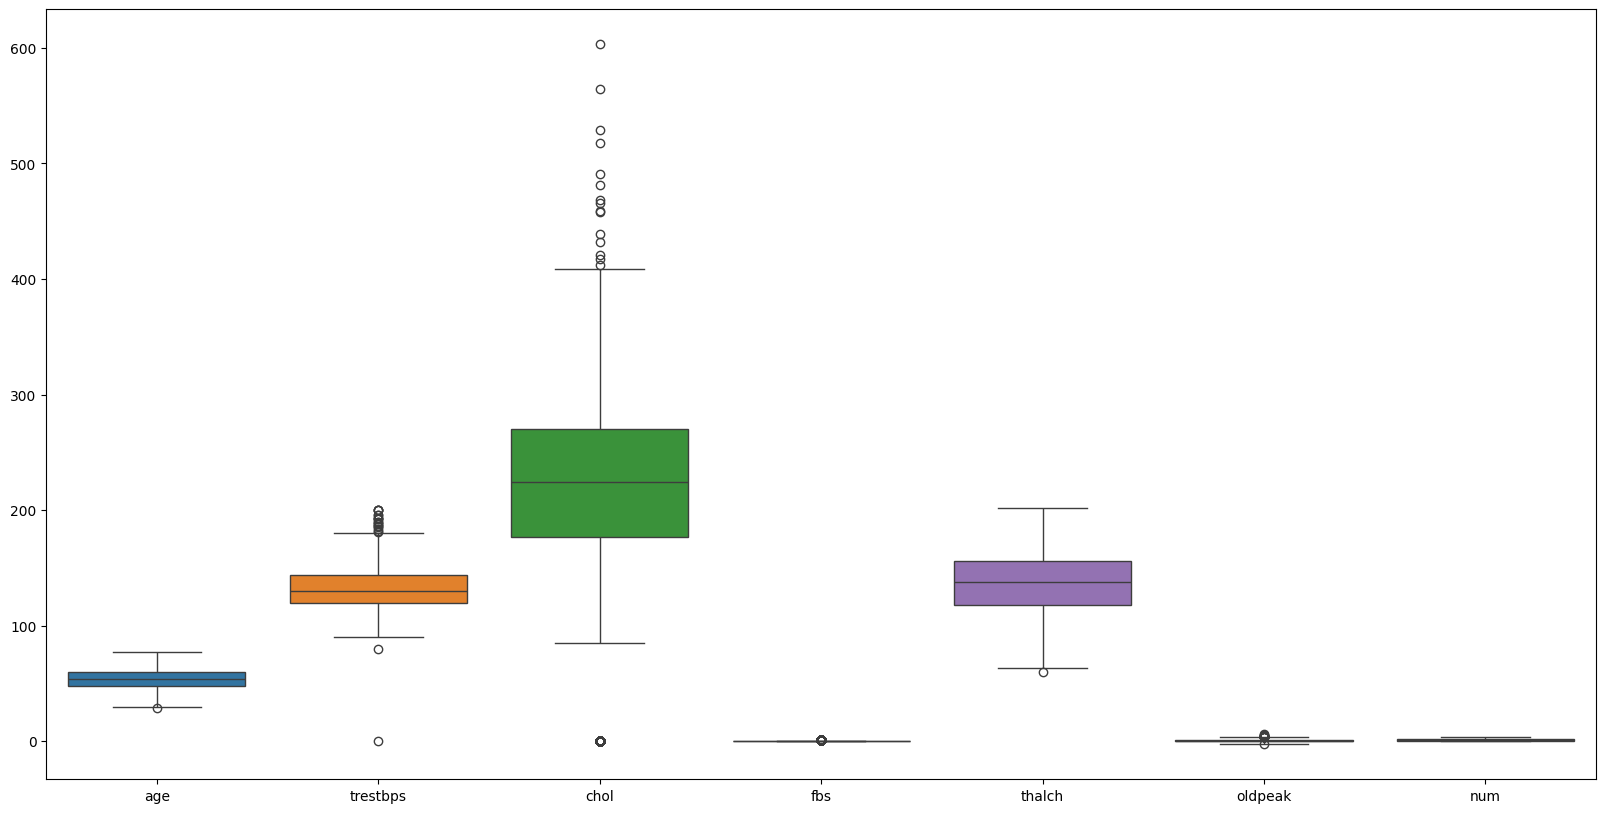

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

In [ ]:
# Task 3: Feature Engineering
# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])
data['fbs'] = le.fit_transform(data['fbs'])
data['restecg'] = le.fit_transform(data['restecg'])
data['exang'] = le.fit_transform(data['exang'].astype(str))
data['slope'] = le.fit_transform(data['slope'])
data['thal'] = le.fit_transform(data['thal'].astype(str))
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,0,4


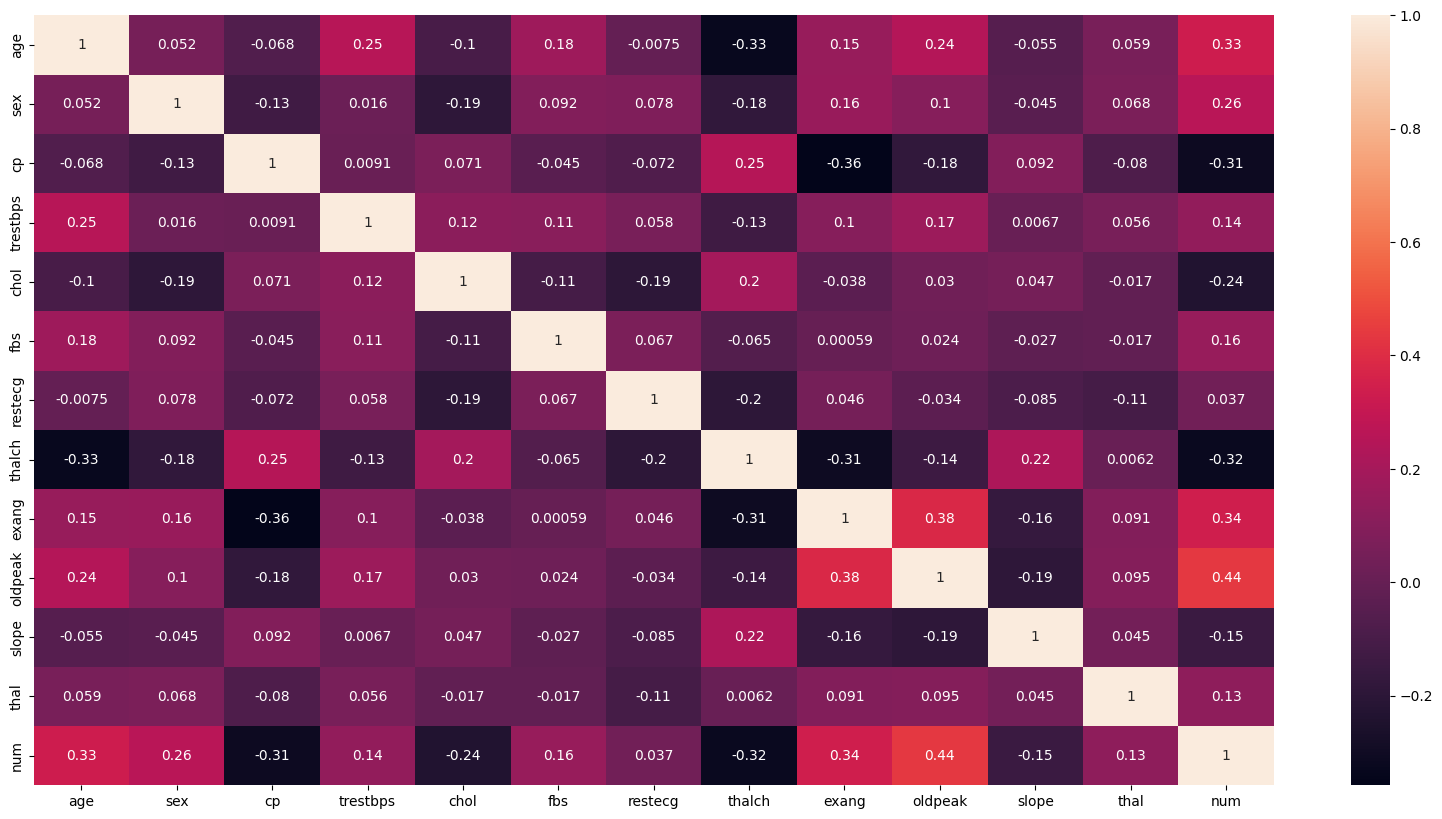

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
# Scale numerical features
scaler = StandardScaler()
data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,1,1.288612,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,1,-0.815249,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,1,-0.449360,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,1,-0.815249,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,3,0.556834,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,0,1,-0.595631,1,0.556834,2,2,4
904,0.896773,1,0,1.597292,-0.281021,0,2,-0.595631,3,1.928917,1,2,4
905,0.241249,1,2,1.793463,-1.798388,0,0,-0.483649,3,1.471556,0,1,4
906,0.241249,1,2,0.518352,0.058155,1,2,-1.155538,2,NaN,0,0,4


In [ ]:
# Task 4: Decision Tree Classification
X = data.drop('num', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,1,1.288612,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,1,-0.815249,1,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,1,-0.449360,1,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,1,-0.815249,1,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,3,0.556834,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,0,1,-0.595631,1,0.556834,2,2
904,0.896773,1,0,1.597292,-0.281021,0,2,-0.595631,3,1.928917,1,2
905,0.241249,1,2,1.793463,-1.798388,0,0,-0.483649,3,1.471556,0,1
906,0.241249,1,2,0.518352,0.058155,1,2,-1.155538,2,NaN,0,0


In [ ]:
y = data['num']
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 4, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 2,
       1, 1, 3, 0, 0, 3, 1, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2,
       0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4,
       1, 1, 3, 0, 0, 0])

In [ ]:
# Calculate probabilities instead of predicted classes
y_prob = dt.predict_proba(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1-score:', f1_score(y_test, y_pred, average='macro'))
print('ROC-AUC:', roc_auc_score(y_test, y_prob, multi_class='ovr')) # Use probabilities in roc_auc_score

Accuracy: 0.6208791208791209
Precision: 0.44659188955996554
Recall: 0.3638564261250976
F1-score: 0.3744307095789516
ROC-AUC: 0.5723021888963888


In [ ]:
# Task 5: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.5385640056683987


In [ ]:
# Task 6: Model Evaluation and Analysis
# Assuming you want to use the best estimator from grid_search
dt = grid_search.best_estimator_

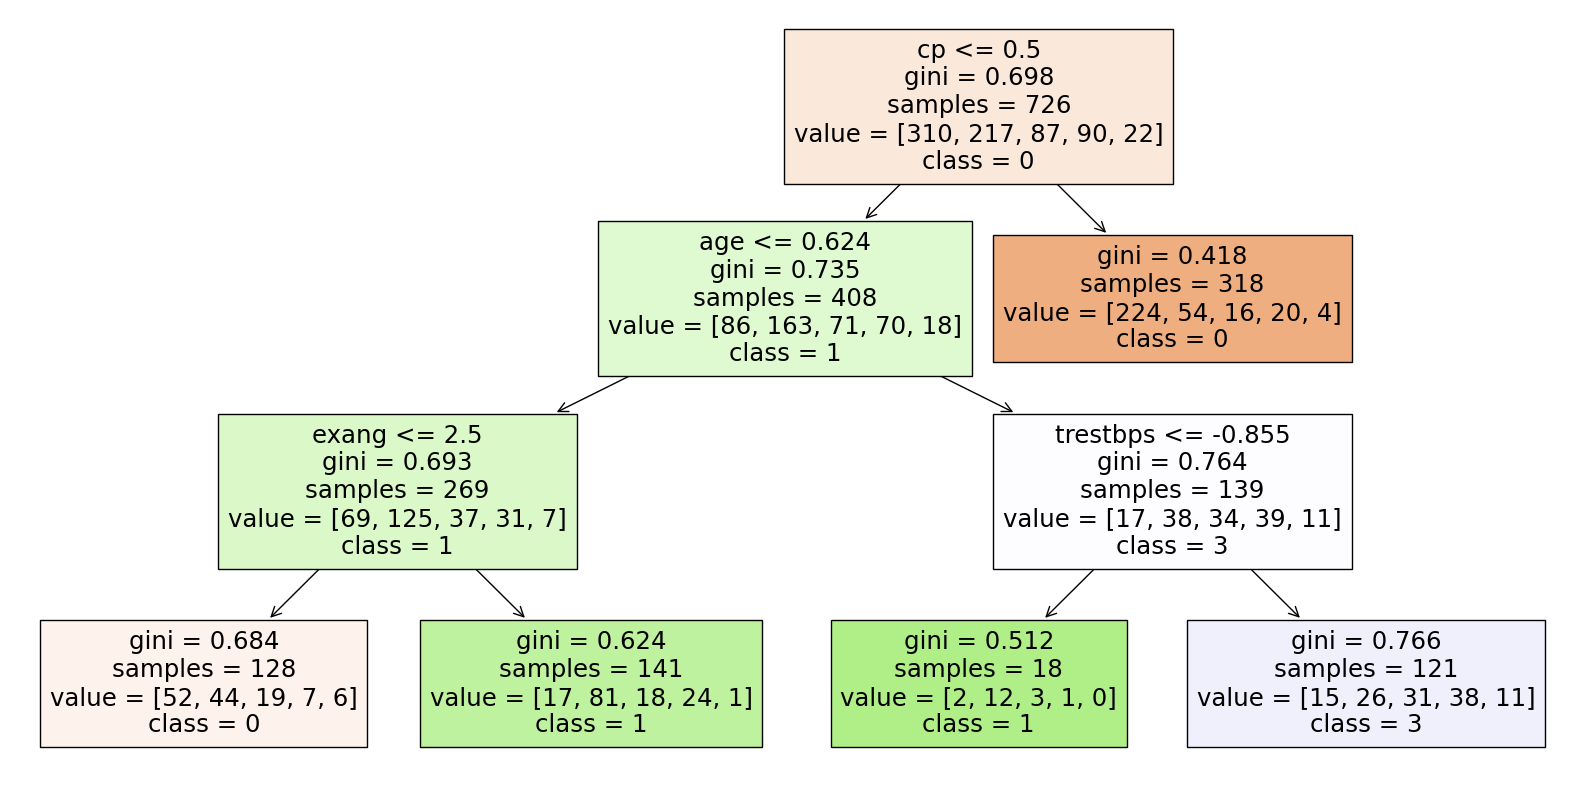

In [ ]:
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names= [str(c) for c in dt.classes_], filled=True)
plt.show()

In [ ]:
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
dec_tree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_pred = dec_tree.predict(X_test)
y_pred

array([1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3,
       1, 1, 2, 1, 1, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.5879120879120879

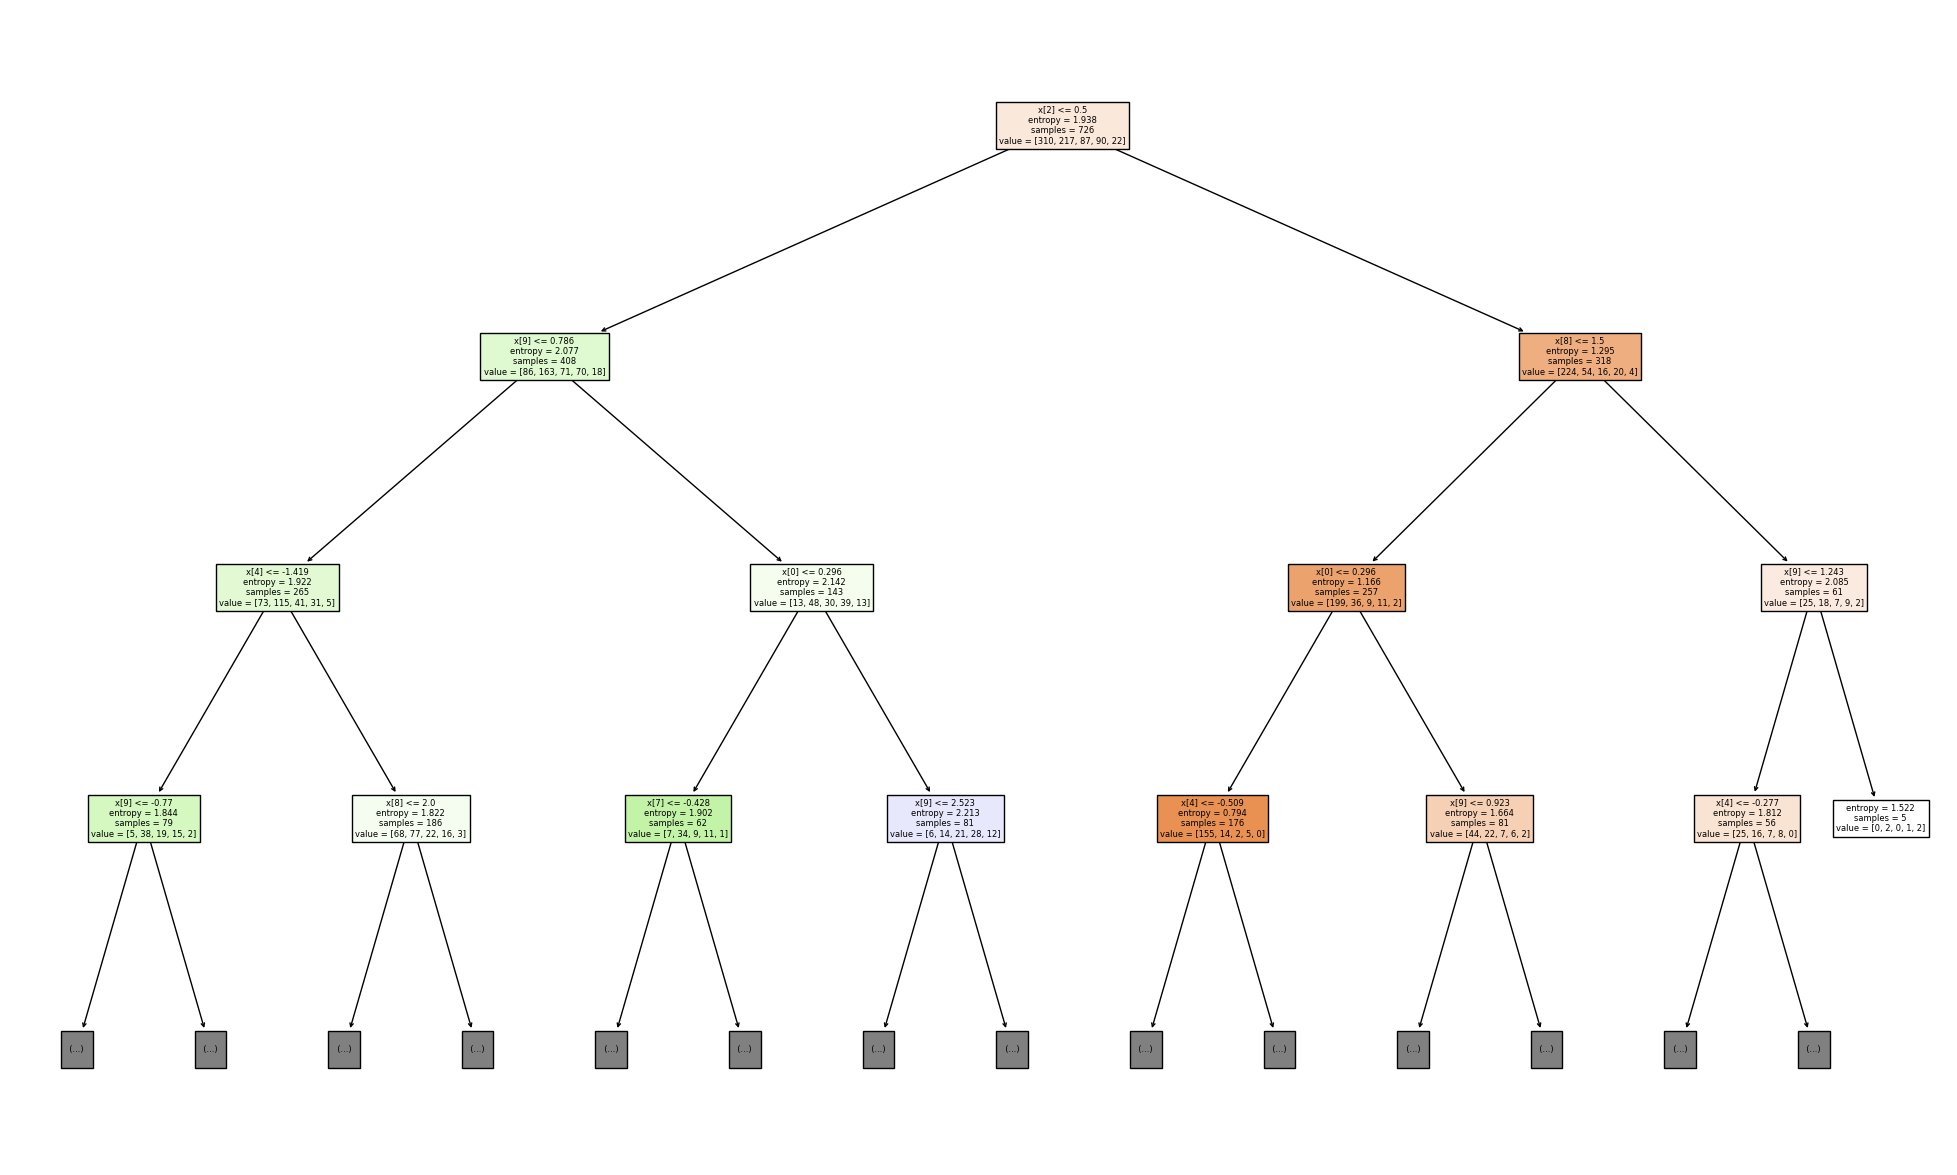

In [ ]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

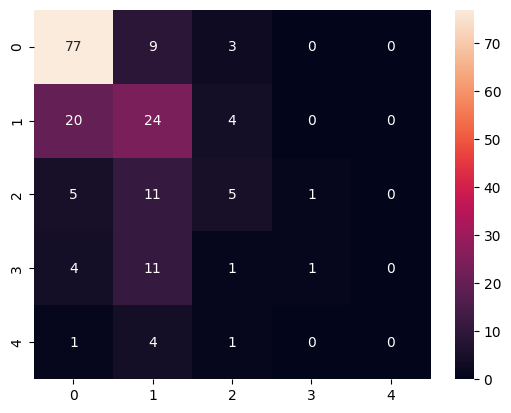

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.41      0.50      0.45        48
           2       0.36      0.23      0.28        22
           3       0.50      0.06      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.59       182
   macro avg       0.40      0.33      0.32       182
weighted avg       0.55      0.59      0.55       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. What are some common hyperparameters of decision tree models and how do they affect the model's performance?
Solution:

Decision Tree models have several hyperparameters that can significantly influence their performance. Some of the most common ones include:

Max Depth (max_depth):

Definition: This parameter controls the maximum depth of the tree. The depth of the tree is the number of nodes along the longest path from the root node down to the leaf node.
Effect: A shallow tree (small max depth) might underfit the data, failing to capture important patterns. A very deep tree (large max depth) might overfit the data, capturing noise as if it were a legitimate pattern.
Min Samples Split (min_samples_split):

Definition: This is the minimum number of samples required to split an internal node.
Effect: If this value is too low, the tree may become overly complex and overfit. If it's too high, the tree may underfit, as it won't split enough times to learn the underlying data distribution.
Min Samples Leaf (min_samples_leaf):

Definition: This parameter sets the minimum number of samples that a leaf node must have.
Effect: Setting this value higher prevents the model from learning too much from any individual sample (overfitting). However, setting it too high might prevent the tree from splitting enough to capture the necessary detail in the data.
Max Features (max_features):

Definition: This hyperparameter restricts the number of features considered for splitting at each node.
Effect: Lowering the number of features can introduce randomness into the tree-building process, often leading to better generalization. However, if set too low, it might miss important patterns that require multiple features to split effectively.
Criterion:

Definition: The function used to measure the quality of a split (e.g., gini for Gini impurity or entropy for information gain).
Effect: Different criteria can lead to different splits at each node. Gini impurity is computationally simpler, while entropy is more theoretically rigorous but computationally expensive.
2. What is the difference between Label Encoding and One-hot Encoding?
Solution:

Label Encoding:

Definition: Label Encoding assigns a unique integer to each category in a categorical feature. For example, the categories "Red", "Green", and "Blue" might be encoded as 0, 1, and 2, respectively.
Use Case: It's typically used when the categorical feature has an ordinal relationship (e.g., "Low", "Medium", "High").
Drawback: Label encoding can introduce unintended ordinal relationships between categories that are not naturally ordered, leading to poor model performance for non-ordinal categorical features.
One-hot Encoding:

Definition: One-hot encoding creates a binary column for each category in the categorical feature. For example, if there are three categories, "Red", "Green", and "Blue", it will create three new columns, where each column represents the presence (1) or absence (0) of a particular category.
Use Case: It is used for nominal categorical features where there is no ordinal relationship.
Drawback: One-hot encoding can result in a high-dimensional dataset if the categorical feature has many levels, which can make the model more complex and potentially harder to train.